In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
dff = pd.read_csv(r'C:\BOOTCAMP\4. SUPERVISED/HR_Dataset.csv')

In [4]:
dff


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
dff.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
d = dff['promotion_last_5years'].value_counts()
labels = d.index.tolist()

In [111]:
d

0    14680
1      319
Name: promotion_last_5years, dtype: int64

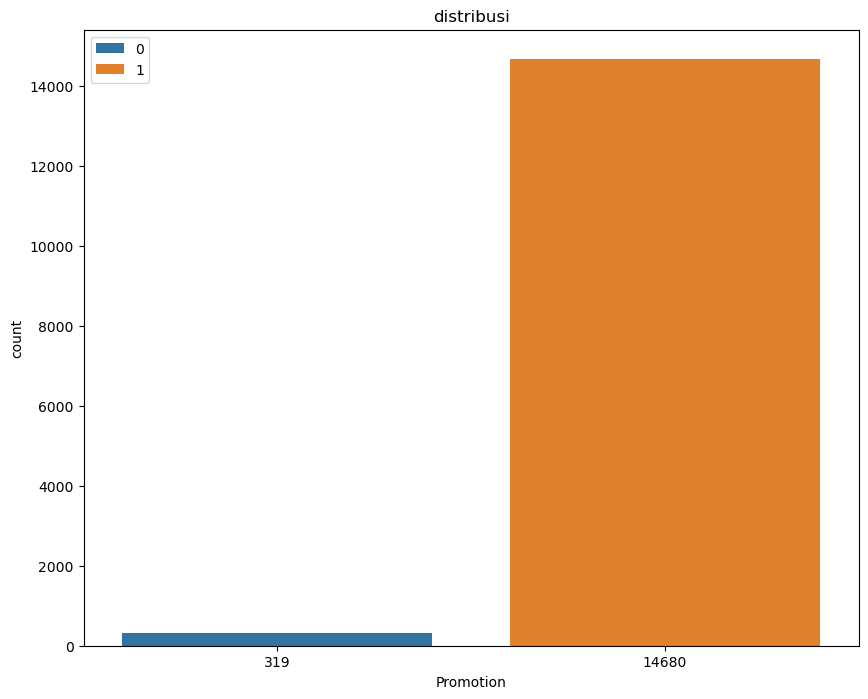

In [115]:
plt.figure(figsize=(10, 8))
sns.barplot(x=d, y=d.values, label=labels)
plt.xlabel("Promotion")
plt.ylabel('count')
plt.title("distribusi")
plt.legend()
plt.show()


In [116]:
dff = dff[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary']]

In [117]:
data_encoded = pd.get_dummies(dff, prefix_sep = '_')
data_encoded = data_encoded.dropna()
data_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _IT,Departments _RandD,...,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [50]:
data_encoded['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [32]:
x = data_encoded.drop(columns = 'promotion_last_5years')
y = data_encoded['promotion_last_5years']

In [44]:
X_train,X_test, y_train, y_test = train_test_split(x,y ,test_size = 0.2)


In [46]:
X_train,X_test, y_train, y_test

(       satisfaction_level  last_evaluation  number_project  \
 4583                 0.79             0.92               3   
 9992                 0.37             0.85               2   
 11291                0.62             0.91               3   
 3660                 0.88             0.59               6   
 943                  0.81             1.00               5   
 ...                   ...              ...             ...   
 9823                 0.58             0.67               5   
 9478                 0.37             0.72               2   
 5691                 0.74             0.75               4   
 9903                 0.73             0.87               4   
 13449                0.39             0.89               3   
 
        average_montly_hours  time_spend_company  Work_accident  left  \
 4583                    204                   3              0     0   
 9992                    185                   3              0     0   
 11291                 

# **SVM**

In [53]:
clf = svm.SVC(C = 1, kernel = 'rbf')
clf.fit(X_train,y_train)

SVC(C=1)

In [56]:
y_predict = clf.predict(X_test)

print('Accuracy :',accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy : 0.976
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2928
           1       0.00      0.00      0.00        72

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.49      3000
weighted avg       0.95      0.98      0.96      3000



In [59]:
clf = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.01)
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)

In [61]:
y_predict = clf.predict(X_test)
print('Accuracy :', accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy : 0.976
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2928
           1       0.00      0.00      0.00        72

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.49      3000
weighted avg       0.95      0.98      0.96      3000

